# Book Recommendation System

### Objective:
    Our goal is to create two book recommendation systems-
        1.Popularity based recommendation system
        2.Collaborative filtering based recommendation system
        
    Popularity based recommendation system - 
        Based on aggregated ratings from users we will create a popularity based recommendation system. This will provide a list of top books recommended by users.
        
    Collaborative filtering based recommendation system - 
        It will take input as - book name and quantity of similar books user requires to get recommended.
    And will provide the list of recommended books
    For Collaborative based recommendation system we will have to create a matrix of Books and Users. Then based on distance method we will calculate similarity score between different books.

In [44]:
# Importing necessary librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [45]:
books = pd.read_csv('D:\\Siddhesh\\Data Science - D\\Projects\\BOOK RECOMMENDATION SYSTEM\\Books.csv')
ratings = pd.read_csv('D:\\Siddhesh\\Data Science - D\\Projects\\BOOK RECOMMENDATION SYSTEM\\Ratings.csv')
users = pd.read_csv('D:\\Siddhesh\\Data Science - D\\Projects\\BOOK RECOMMENDATION SYSTEM\\Users.csv')

# EDA and Data Cleaning 

In [46]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [47]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [48]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Checking for duplicated entries 

In [49]:
print('Total No. of Listed Books:',books.shape[0])
print('Total No. of Unique Books:',books['Book-Title'].nunique())
print('*'*50)
print('Total No. of Listed users:',users.shape[0])
print('Total No. of Unique Users',users['User-ID'].nunique())
print('*'*50)
print('Total No. of Listed Ratings',ratings.shape[0])

Total No. of Listed Books: 271360
Total No. of Unique Books: 242135
**************************************************
Total No. of Listed users: 278858
Total No. of Unique Users 278858
**************************************************
Total No. of Listed Ratings 1149780


In [50]:
print('Total number of duplicate books:',books['Book-Title'].duplicated().sum())

Total number of duplicate books: 29225


In [51]:
books[books['Book-Title'].duplicated()].head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
239,0743486226,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...


In [52]:
books[books['Book-Title']=='Angels &amp; Demons'].head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
239,0743486226,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...
28002,0671027352,Angels &amp; Demons,Dan Brown,2000,Atria,http://images.amazon.com/images/P/0671027352.0...,http://images.amazon.com/images/P/0671027352.0...,http://images.amazon.com/images/P/0671027352.0...


#### Observations
    1. We can note that in case of Book names there are some 29225 duplications. This is because of two reasons -
    a. The same book is published by different publishers. 
    b. Year of publishing is different. 
    Even though the books have same name there ISBN code is different. So we cannot simply drop these duplicate books. Since the user ratings are based on the ISBN code of the book and not on the book name.
    2. All listed user names are unique and no duplication found there.
    3. In Ratings dataset there are two columns- Book's ISBN code and User ID. There is indeed going to be duplication here. This is expected since user names and ISBN of book is going to get repeated.

### Checking for Null Values 

In [53]:
books.isnull().sum()/books.isnull().count()

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000004
Year-Of-Publication    0.000000
Publisher              0.000007
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.000011
dtype: float64

In [54]:
# There are not much missing values here. We will ignore it for now. If need arises we will deal with them later

In [55]:
ratings.isnull().sum()/ratings.isnull().count()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [56]:
users.isnull().sum()/users.isnull().count()

User-ID     0.000000
Location    0.000000
Age         0.397199
dtype: float64

In [57]:
# There are about 40% null values in the age column. We will have impute values in this column. We cannot simply drop this.
# Since its a very important column.

### Merging datasets to explore relationships and do analysis

In [58]:
# Lets merge the dataset books and ratings. Since both of them sahre ISBN code as common attribute we will merge on it.

In [59]:
book_ratings=pd.merge(ratings,books,on='ISBN',how='left')

In [60]:
book_ratings.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...


### Lets answer few questions which can help us to build the recommendation system

In [61]:
# What is the distribution of book ratings

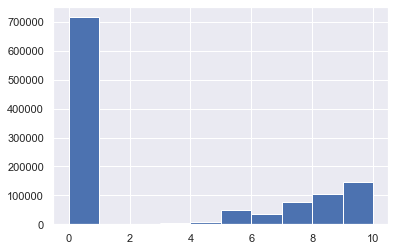

In [62]:
plt.hist(book_ratings['Book-Rating'])
plt.show()

In [63]:
book_ratings['Book-Rating'].value_counts()[0]/book_ratings['Book-Rating'].count()

0.6228226269373272

##### We cannot drop '0' rated columns. Since they make more than 60% of total ratings. Indeed many people have rated many books '0'.

# Popularity Based Recommendation System

In [64]:
# Let's sort the dataset on basis of popularity.
# First. let's count the number of people who have rated a particular book.

In [65]:
book_ratings.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...


In [66]:
ratings_count=(book_ratings.groupby('Book-Title').count()['ISBN']).reset_index()

In [67]:
ratings_count.head()

,Book-Title,ISBN
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [68]:
# Now lets count the average rating of each book

In [69]:
ratings_mean=((book_ratings.groupby('Book-Title')).mean()['Book-Rating']).reset_index()

In [70]:
ratings_mean.head(2)

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00


In [71]:
rated_book_df = (pd.merge(ratings_count,ratings_mean,on='Book-Title'))

In [72]:
rated_book_df.rename({'ISBN':'Rating-Count'},axis=1,inplace=True)
rated_book_df.head(2)

,Book-Title,Rating-Count,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00


In [73]:
# We will consider only those books which have been rated by atleast 250 people to get an accurate average rating.

In [74]:
rated_book_df = (rated_book_df[rated_book_df['Rating-Count']>=250]).sort_values(by='Book-Rating',ascending=False)

In [75]:
rated_book_df.head(3)

,Book-Title,Rating-Count,Book-Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410


In [77]:
# We will merge the rated_book DF with books DF to get required data like Author name and Image URl. Here we also drop the
# duplicate books.

In [78]:
pop_df = ((pd.merge(rated_book_df,books,on='Book-Title')).drop(['Image-URL-S','Image-URL-L','ISBN','Publisher','Year-Of-Publication'],axis=1)).drop_duplicates('Book-Title')

In [79]:
pop_df=(pop_df.reset_index()).drop('index',axis=1)

In [80]:
pop_df

,Book-Title,Rating-Count,Book-Rating,Book-Author,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...
...,...,...,...,...,...
181,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283,A. Manette Ansay,http://images.amazon.com/images/P/0380730138.0...
182,Whispers,286,2.199301,BELVA PLAIN,http://images.amazon.com/images/P/0440216745.0...
183,Presumed Innocent,294,2.139456,Scott Turow,http://images.amazon.com/images/P/0446359866.0...
184,Isle of Dogs,288,2.000000,Patricia Cornwell,http://images.amazon.com/images/P/0425182908.0...


In [81]:
top_10_rated_books = pop_df.head(10)

In [82]:
#Following are Top 10 books based on User Rating
top_10_rated_books

,Book-Title,Rating-Count,Book-Rating,Book-Author,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...
5,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...
6,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...
7,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...
8,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...
9,To Kill a Mockingbird,510,4.700000,Harper Lee,http://images.amazon.com/images/P/0446310786.0...


# Collaborative Filtering Based System 

It will take input as - book name and quantity of similar books user requires to get recommended.
And will provide the list of recommended books.
For Collaborative based recommendation system we will have to create a matrix of Books and Users. Then based on distance method we will calculate similarity score between different books.

In [83]:
book_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [84]:
book_ratings['User-ID'].nunique()

105283

In [85]:
# There are total 1,05,283 unique users. Instead of considering ratings/opnion given by all of them. We should consider
# users who have provided a certain number of ratings. Lets decide that threshold

In [86]:
book_ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [87]:
print('Percent of Users who have rated only one book',round((((book_ratings['User-ID'].
                                                              value_counts()[book_ratings['User-ID'].value_counts()==1]).
                                                             count()/(book_ratings['User-ID'].count()))*100),2),'%')

Percent of Users who have rated only one book 5.15 %


In [88]:
print('Percent of Users who have rated atleast 50 books',round((((book_ratings['User-ID'].
                                                              value_counts()[book_ratings['User-ID'].value_counts()>=50]).
                                                             count()/(book_ratings['User-ID'].count()))*100),2),'%')

Percent of Users who have rated atleast 50 books 0.3 %


In [89]:
z=book_ratings['User-ID'].value_counts()
z[z>100].values

array([13602,  7550,  6109, ...,   101,   101,   101], dtype=int64)

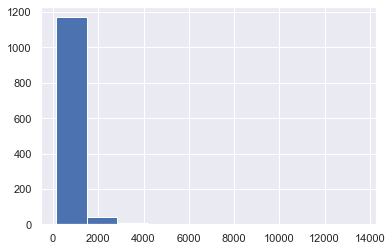

In [92]:
temp= z[z>150].values
plt.hist(temp)
plt.show()

In [93]:
print('Percent of Users who have rated atleast 150 books',round((((book_ratings['User-ID'].
                                                              value_counts()[book_ratings['User-ID'].value_counts()>=150]).
                                                             count()/(book_ratings['User-ID'].count()))*100),2),'%')

Percent of Users who have rated atleast 150 books 0.11 %


In [94]:
# Lets consider users who have given atleast 150 reviews. These users come under top 0.1%

In [96]:
users_150 = (book_ratings['User-ID'].value_counts()[book_ratings['User-ID'].value_counts()>=150]).index

In [97]:
book_ratings['User-ID'].nunique()

105283

In [98]:
users_150

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             27472,  55858, 120598,  29526,  53392, 117384, 115435, 217986,
             86145, 161936],
           dtype='int64', length=1234)

In [99]:
# There are total 1234 users who have rated more than 150 books

In [100]:
top_users_rating = book_ratings[book_ratings['User-ID'].isin(users_150)]

In [101]:
top_users_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1457,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1458,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1459,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1460,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...


In [104]:
# Further we should consider books which is being rated by atleast 50 users. Books which are rated by less than 50 users
# directly comes under our criteria of less popular

In [105]:
top_users_books = top_users_rating[top_users_rating['Book-Title'].isin((top_users_rating['Book-Title'].value_counts()[top_users_rating['Book-Title'].value_counts()>50]).index)]
top_users_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1469,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1471,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1474,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1480,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1149589,276680,0688163165,10,Mystic River,Dennis Lehane,2001,William Morrow &amp; Company,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...
1149595,276680,0743411323,0,Never Change,Elizabeth Berg,2001,Atria,http://images.amazon.com/images/P/0743411323.0...,http://images.amazon.com/images/P/0743411323.0...,http://images.amazon.com/images/P/0743411323.0...
1149599,276680,0743422449,0,Mercy,Jodi Picoult,2001,Washington Square Press,http://images.amazon.com/images/P/0743422449.0...,http://images.amazon.com/images/P/0743422449.0...,http://images.amazon.com/images/P/0743422449.0...
1149604,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...


In [106]:
# Now we will for matrix which has Users as Columns and Books as rows. There intersection will have the rating provided by a 
# particular user for a particular book

In [107]:
# Pivot Table
pivot1=top_users_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot1

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274308,274808,275970,276018,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Here we have 865 books and 1217 users list.

In [109]:
# Fill the NaN values with 0

In [110]:
pivot1.fillna(0,inplace=True)

In [111]:
pivot1

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274308,274808,275970,276018,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Now we will find similarity between books by using cosine similarity.

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
similarity_df = cosine_similarity(pivot1)

In [115]:
similarity_df
# This array shows similarity of books wrt each and every other book.

array([[1.        , 0.0733113 , 0.00921967, ..., 0.0917654 , 0.06126214,
        0.03372287],
       [0.0733113 , 1.        , 0.25071634, ..., 0.05802155, 0.14381991,
        0.1388504 ],
       [0.00921967, 0.25071634, 1.        , ..., 0.03752511, 0.04473056,
        0.0916347 ],
       ...,
       [0.0917654 , 0.05802155, 0.03752511, ..., 1.        , 0.06439035,
        0.01670749],
       [0.06126214, 0.14381991, 0.04473056, ..., 0.06439035, 1.        ,
        0.09936127],
       [0.03372287, 0.1388504 , 0.0916347 , ..., 0.01670749, 0.09936127,
        1.        ]])

In [116]:
# This array shows similarity of one book wrt other 864 books.
similarity_df.shape

(865, 865)

In [117]:
# Creating function to recommend top 5 books based on similarity score
def book_recommend(book_name,n=5):
    # Book name index
    index1 = np.where(pivot1.index==book_name)[0][0]
    # Sorted array of Similarity score for particlar book
    arr = (sorted(list(enumerate(similarity_df[index1])),key= lambda x: x[1],reverse=True))[1:(n+1)]
    print(f'The Top {n} books similar to {book_name} are:')
    count1=1
    for i in arr:
        print(f'{count1})',pivot1.index[i[0]])
        count1+=1

In [125]:
book_recommend("1984",10)

The Top 10 books similar to 1984 are:
1) Animal Farm
2) Brave New World
3) Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
4) Lord of the Flies
5) The Handmaid's Tale
6) The Catcher in the Rye
7) The Hitchhiker's Guide to the Galaxy
8) Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players
9) Naked
10) Timeline
